In [15]:
import time

# Introducing Big O Notation

"Big O" notation is a way to describe how the time complexity/efficiency of an algorithm (or function) scales with the size of the data that it is processing. Let's discuss two imaginary examples to help illustrate this:

Example 1:

Let's say you have a dictionary with 1,000 words in it, but the order of the words is not-alphabetical, it is random! I now ask you to lookup the definition of a word in the dictionary.  How would you have to do this? You would have to go through each word one at a time until you found the word (or until you reached the end of the dictionary and tell me that the word is not included in the dictionary).  So, in this example, the *worst case* is that you have to review 1,000 words! If I then handed you a larger dictionary of 1,000,000 words, that was also random, you'd have to review 1,000,000 words! That is not efficient. Notice how the number of steps (in the worst case scenario - which is often how we talk about time complexity) that you have to perform scales directly with the size of the scrambled dictionary.  I.e. a 100 word dictionary would take you 100 steps, a 10,000 word dictionary would take you 10,000 steps, a 1,000,000 word dictionary would take you 1,000,000 steps!  In general, an `n` word dictionary would take you `n` steps!


Example 2:

Let's now imagine another example. This time you have a dictionary that is in alphabetical order, and it even has those tabs on the side so you can flip to a word quickly. You also happen to be very good at flipping to the right page by using those tabs.  Now what is the time complexity? It really just takes about one move to look up the word. You are able to flip to the correct page because the dictionary is in alphabetical order - you do not have to scan each word, it only takes one move!  What if your dictionary has 1,000 words or 10,000,00 words? It is still just one move! So if your dictionary has `n` words it still only takes 1 step! So, we see that being able to flip to the correct page in one move is much faster and takes the same amount of time no matter how big the dictionary is. (Yes..I realize that in real life you probably flip to a page that is close to the word and then have to flip a few more pages to get to the correct word, but still, this is much faster).

Notice, that the only difference is these two examples is how the data is stored. In example 1, the words are randomly stored in the dictionary, in example 2, they are alphabetical, with tabs, allowing us to jump right to the word.

Now, how can we describe the difference in the time complexity between these two algorithms?  We can use "Big O" notation. To write "Big O" notation you first write a capital O, and then write, in parentheses, the order of `n` that the algorithm scales with. The capital O is short for "order", and the order of `n` is a non-linear function of `n`. Often, this nonlinear function is a power of `n`. Some powers of `n` are `n^0` (which is `1`), `n^1` (which is just `n`), `n^2`, `n^3`, etc...  Which of these powers of `n` describe the time complexities of the two examples?  (Note this is not a trick question - it happens to be very straight forward). We already said that example 1 scales with `n` (which is a simpler way to write `n^1`), and example 2 always just takes one step, so it "scales" to 1 (which is also a way of writing `n^0`).

So, the Big O notation for example 1 is O(n), and the Big O notation for example 2 is O(1).



## Another Motivating Example

In the below cells we show two methods to add 10000 to a number. Method A is ridiculous - we add 1 to the number 10000 times. In method B, we just add 10000 to the number.  

Let's consider how many steps each method takes. Then we will run each cell, using the %%timeit magic command, to measure how long each method takes.

### Adding 10000, Method A

How many steps does this take? Each time the for loop performs an iteration, it needs to find the next value of `_` (even though `_` is a dummy variable we aren't using), and then `1` is added to `my_num`.  So there are 2 steps for each iteration of the loop. Below, we run the loop 10,000 times, so there are 2\*10,000 = 20,000 steps. What if, instead of adding 10,000 we only wanted to add 1,000? Well, we would only run the loop 1,000 times, and the number of steps would be 2,000.

So, if we consider `n` to be the size of the number we are adding, what equation can we write to calculate the number of steps the the algorithm below takes? We can write `number_of_steps = 2n`

We see that the number of steps scales with `n` (not 1, or `n^2`, etc..) so the Big O notation for this algorithm would be O(n).

**Note**: You may be wondering how many steps python really performs "under the hood". That is a good question, because python is a higher level language and maybe each iteration of the loop takes 10 steps, but that level of detail does not actually matter for what we want to learn and do.

In [ ]:
%%timeit
my_num = 0
for _ in range(10000):
    my_num += 1

### Adding 10000, Method B

How many steps does this take? Just 1 step no matter how big the number we are adding is! So the Big O notation is just O(1).

In [ ]:
%%timeit
my_num = 0
my_num += 10000

#### Wow, method B is *much* faster than method A:
A microsecond (*u*s) is 1000 nanoseconds (ns). So ~800 *u*s is ~800000 ns, that is about 16000 times slower than ~50 ns

# More Examples!

## Example 1

Below, we have a function that converts a list of Celsius temperatures to Fahrenheit. In this case, `n` is the size of the list that is input to the function.  Let's describe the number of lines that are run when this function is called. The first line that creates the `temps_fahrenheit` list takes one line of code. Then, the loop executes three lines for each iteration of the loop. The, the function returns the value. So, an equation that gives the number of lines run would be `number_of_lines = 3n + 2`. Therefore, the "Big O" notation that describes the time-complexity is O(n).

In [ ]:
temps_c = [22, 34.5, 27, 31.2, 23.8]

def convert_c_to_f(temps_c):
    '''Take a list of temps in celcius, and convert them to fahrenheit and add
    them to a new list'''
    temps_fahrenheit = []
    for tc in temps_c:
        tf = (tc * (9/5)) + 32
        temps_fahrenheit.append(tf)
    return temps_fahrenheit

temps_fahrenheit = convert_c_to_f(temps_c)
print(temps_fahrenheit)

## Example 2:

In the function `all_combos_of_three_dice` we calculate all the combinations of three dice with `n` number of sides. Note that we are counting order, so the dice combos (1, 1, 2), (1, 2, 1), and (2, 1, 1) all count as different combinations.

How many lines run in this function? Well, the inner most loop runs 3 lines on every iteration, and the inner loop is run completely for every iteration of the middle loop, and the middle loop is run completely for every iteration of the outer most loop. An equation for this with be `number_of_lines = 3n^3`. So, the "Big O" notation is O(n^3).

In [ ]:
def all_combos_of_three_dice(n_sides=6):
    '''Print all the combos for three dice of n-sides. Order matters.'''
    for dice_1 in range(n_sides):
        for dice_2 in range(n_sides):
            for dice_3 in range(n_sides):
                dice_faces = "{}, {}, {}".format(dice_1, dice_2, dice_3)
                print(dice_faces)

all_combos_of_three_dice()

## Introducing "Big O" Notation

Let's describe how the equations above scale with the value `n`.  Again - this is a very straight forward example, don't over think it.  The equation for method A scales with `n` (other options might be `n^2`, `log(n)`, etc.. but, clearly, the equation scales directly with `n`.

# Let's now look at the Big O notation for the 'in' operation on lists and sets.

If we were to check if a value is in a list, this would only be one line of code, as shown below, but we know that Python is implementing an algorithm behind the scenes to complete this.  Similarly, if we check if an item is in a set, python is implementing an algorithm behind the scene. Let's test both of these operations and guess which the time complexity of each.

In [1]:
my_100_list = list(range(100))
my_100_set = set(my_100_list)

In [2]:
%%timeit
99 in my_100_list

1.65 µs ± 8.13 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [3]:
%%timeit
99 in my_100_set

49.3 ns ± 0.316 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [4]:
my_1000_list = list(range(1000))
my_1000_set = set(my_1000_list)

In [5]:
%%timeit
999 in my_1000_list

16.1 µs ± 105 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
%%timeit
999 in my_1000_set

71.9 ns ± 0.93 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [7]:
my_10000_list = list(range(10000))
my_10000_set = set(my_10000_list)

In [8]:
%%timeit
9999 in my_10000_list

160 µs ± 356 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%%timeit
9999 in my_10000_set

66.8 ns ± 0.287 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


#### What can we conclude that the Big O Nation is for the 'in' operator on lists and sets?

"in" on lists: O(n)

"in" on sets: O(1)

### Let's look at the Time Complexity For Various Operations on Various Python Data Structures

https://wiki.python.org/moin/TimeComplexity

### Now, let's look at the Time Comlexity For General Data Structures and Algorithms

http://bigocheatsheet.com

## How Lists Are Implemented In Python

In Python, lists are implemented as arrays that are contiguous blocks in memory. Each element in the array is a pointer that points to the location in memory of the value for that a element of the list.  That is pretty confusing.. let's look at a picture that will make this clearer.

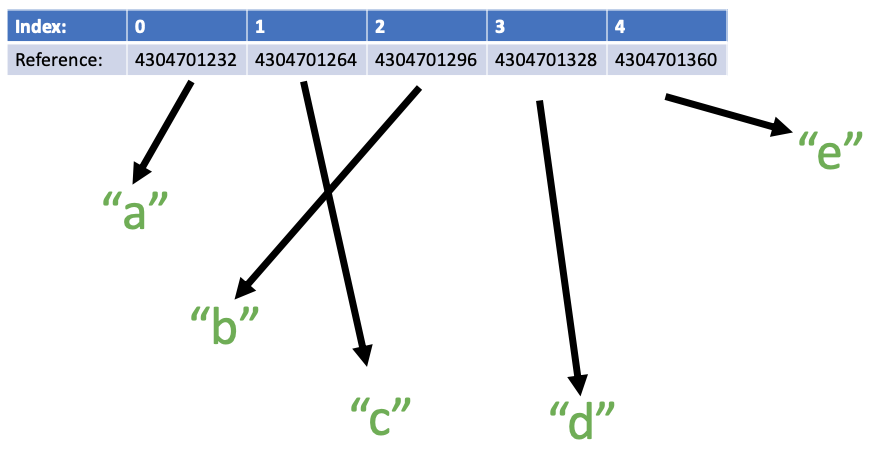

### So now that we know this, can we say why is it slow, O(n), to run the "in" algorithm on a list?
You have to look at every item in the list until you find it, very similar to our example with a scrambled dictionary.

### What if we want to jump right to an index - is that fast?
Yes! We can jump right to the index in constant time, O(1)! This is an advantage of arrays.

#### We can actually find the reference id for each item in a list with the code below.
You don't really need to do this in practice, but it does help us understand lists a little better!

We use the id function to find the reference id of the value, you can learn more about the id function here: https://docs.python.org/3/library/functions.html#id

In [13]:
my_list = ['a', 'b', 'c', 'd', 'e']
list_refs = list(map(id, my_list))
print("This is our list:", my_list)
print("These are the reference ids for the list:", list_refs)

This is our list: ['a', 'b', 'c', 'd', 'e']
These are the reference ids for the list: [4349982624, 4349555856, 4349494360, 4349743936, 4349672392]


In [22]:
my_list_2 = ['dog', 'cat', 'a']
list_refs_2 = list(map(id, my_list_2))
print("This is our list:", my_list_2)
print("These are the reference ids for the list:", list_refs_2)

This is our list: ['dog', 'cat', 'a']
These are the reference ids for the list: [4436176096, 4351196944, 4349982624]


## How Sets Are Implemented In Python

Sets are implemented as hash tables.  A hash table takes the value that you want to save in the table, applies a function to it that generates an address in memory, and then puts the value in that location.  The important thing to realize here is that the value determines the address so if you want to look up a value it's very easy to calculate the address of where is should be and then you can just look in that location to see if it is there!

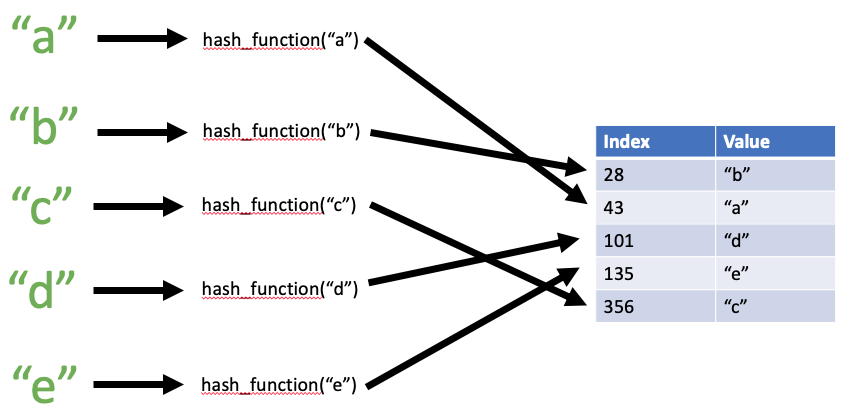



### So, will a hash function output a unique index for EVERY possible string (or number, etc..) that is input to it?

No, that is actually impossible. Just consider all the variations of just 100 characters, that is 26^100 power!! You do not want an array with an index from 0 to 3142930641582938830174357788501626427282669988762475256374173175398995908420104023465432599069702289330964075081611719197835869803511992549376

So what happens?  The hash function will map multiple strings to the same index. Let's consider a *very simple* hash function that determines the index of the string by just looking that last letter. The has table has indices from 0 to 25 (because there are 26 letters in the alphabet.  This means that 'cat' and 'tot' will map to the same value? What happens then? This is called a collision, and there are various strategies to deal with this that we will discuss in lecture.

### So now that we know this, can we say why is it fast, O(1), to run the "in" algorithm on a set?
Yes, we know that we can "hash" the value to generate the index of where it would be in the hash table, and see if it is there.

### What are some disadvantages to sets?
* You can not order the values (unlike a list).
* You can not have duplicate values.

## A Dictionary Is Very Similar To A Set

A dictionary is also implemented as a hash table. The key is used as the input to the hash function, but the key and value are stored in the hash table.

## Append vs Insert On A List

Now that we know that lists are implemented as arrays that are contiguous in memory, let's think about the difference in the time complexity between append and insert. To perform an append, we can leave the existing array alone, and "just" open up more memory that is adjacent to the list, so that array is still contiguous. This is the same step no matter how large the array is, so this is O(1).

To perform an insert, we need to shift the elements in the array in memory to make room for the new value. The number of elements we have to shift is, of course, dependent on how large the array is, so this is O(n).

Let's see the time difference below. I use the time module here because the %%timeit command tends to take way to long to perform these tests, and I didn't want to reduce the size of `n`.

In [16]:
my_list = ['a', 'b', 'c']

In [17]:
time_start = time.time()
for _ in range(100000):
    my_list.insert(1, 1)
print(time.time() - time_start)

3.3884050846099854


In [18]:
my_list = ['a', 'b', 'c']

In [19]:
time_start = time.time()
for _ in range(100000):
    my_list.append(1)
print(time.time() - time_start)

0.023818016052246094


## Memoization and Space Complexity

Let's now think about memoization. In a previous week we learned how to implement memoization and that it is essentially a technique to store the most recent K responses of a complex function in a dictionary. This way, if you call the function again with the same input that was used to generate one of the K responses, you can just look up the result in the dictionary.  The function could be O(n!) but the lookup will be O(1)!

So why would we not *always* use memoization. Why isn't it a default? The answer is, of course, because it takes up more memory. If you are storing the most recent K values, then your space complexity is O(K). When thinking about processes and algorithms, you often have a trade off between time complexity and space complexity.